# TD2: Deep learning

In this TD, you must modify this notebook to answer the questions. To do this,

1. Fork this repository
2. Clone your forked repository on your local computer
3. Answer the questions
4. Commit and push regularly

The last commit is due on Wednesday, December 4, 11:59 PM. Later commits will not be taken into account.

Install and test PyTorch from  https://pytorch.org/get-started/locally.

In [ ]:
%pip install torch torchvision


To test run the following code

In [1]:
import torch

N, D = 14, 10
x = torch.randn(N, D).type(torch.FloatTensor)
print(x)

from torchvision import models

alexnet = models.alexnet()
print(alexnet)

tensor([[ 0.5466, -1.2531,  0.8499, -0.8348,  0.0946,  0.4959, -0.9624,  0.5241,
          0.0651,  0.2770],
        [-0.8758, -0.0878,  0.6238,  2.4831, -0.6009,  1.5136, -0.5351, -0.3362,
          0.4747, -1.4130],
        [ 0.2022, -1.1696,  0.5959, -1.0664,  0.9172,  0.6341,  0.2246,  0.7909,
          0.1268,  0.0793],
        [-1.3151, -1.1754,  1.0594,  0.6523, -0.3701, -2.4442,  1.6612, -0.1275,
         -0.8594,  0.2509],
        [ 0.2595, -0.6624,  0.6219, -0.1096,  0.5654, -0.3157, -1.3748, -0.0418,
          0.7655,  0.3946],
        [-0.9053,  0.2322,  1.5690, -0.3493,  0.8776,  0.7817,  0.6457,  1.8725,
         -1.9136, -0.6038],
        [-1.2652, -1.3283, -0.7684, -0.2346, -1.2160,  1.4447, -0.2295,  1.6164,
         -1.4780,  0.3379],
        [-0.4196, -0.3001, -0.6154,  0.5586, -0.0412,  0.9600,  0.3464,  0.6927,
          0.8578,  0.3753],
        [-1.3067, -1.3310,  0.2687, -0.7839,  0.5905,  0.8409, -0.0771,  1.2425,
          2.4098,  0.0804],
        [ 0.4202, -

## Exercise 1: CNN on CIFAR10

The goal is to apply a Convolutional Neural Net (CNN) model on the CIFAR10 image dataset and test the accuracy of the model on the basis of image classification. Compare the Accuracy VS the neural network implemented during TD1.

Have a look at the following documentation to be familiar with PyTorch.

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

You can test if GPU is available on your machine and thus train on it to speed up the process

In [2]:
import torch

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print("CUDA is not available.  Training on CPU ...")
else:
    print("CUDA is available!  Training on GPU ...")

CUDA is available!  Training on GPU ...


Next we load the CIFAR10 dataset

In [3]:
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# choose the training and test datasets
train_data = datasets.CIFAR10("data", train=True, download=True, transform=transform)
test_data = datasets.CIFAR10("data", train=False, download=True, transform=transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers
)
valid_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers
)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size, num_workers=num_workers
)

# specify the image classes
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

Files already downloaded and verified
Files already downloaded and verified


### CNN definition (this one is an example)

In [4]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# create a complete CNN
model = Net()
print(model)
# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Loss function and training using SGD (Stochastic Gradient Descent) optimizer

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # specify loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)  # specify optimizer

n_epochs = 30  # number of epochs to train the model
train_loss_list = []  # list to store loss to visualize
valid_loss_min = np.inf  # track change in validation loss

for epoch in range(n_epochs):
    # Keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0

    # Train the model
    model.train()
    for data, target in train_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Clear the gradients of all optimized variables
        optimizer.zero_grad()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer.step()
        # Update training loss
        train_loss += loss.item() * data.size(0)

    # Validate the model
    model.eval()
    for data, target in valid_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Update average validation loss
        valid_loss += loss.item() * data.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader)
    valid_loss = valid_loss / len(valid_loader)
    train_loss_list.append(train_loss)

    # Print training/validation statistics
    print(
        "Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}".format(
            epoch, train_loss, valid_loss
        )
    )

    # Save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print(
            "Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...".format(
                valid_loss_min, valid_loss
            )
        )
        torch.save(model.state_dict(), "model_cifar.pt")
        valid_loss_min = valid_loss

Epoch: 0 	Training Loss: 43.875489 	Validation Loss: 39.088471
Validation loss decreased (inf --> 39.088471).  Saving model ...
Epoch: 1 	Training Loss: 35.246950 	Validation Loss: 32.545787
Validation loss decreased (39.088471 --> 32.545787).  Saving model ...
Epoch: 2 	Training Loss: 31.350470 	Validation Loss: 30.292291
Validation loss decreased (32.545787 --> 30.292291).  Saving model ...
Epoch: 3 	Training Loss: 29.216000 	Validation Loss: 28.571590
Validation loss decreased (30.292291 --> 28.571590).  Saving model ...
Epoch: 4 	Training Loss: 27.463810 	Validation Loss: 27.415466
Validation loss decreased (28.571590 --> 27.415466).  Saving model ...
Epoch: 5 	Training Loss: 26.141601 	Validation Loss: 25.894582
Validation loss decreased (27.415466 --> 25.894582).  Saving model ...
Epoch: 6 	Training Loss: 24.919769 	Validation Loss: 25.449152
Validation loss decreased (25.894582 --> 25.449152).  Saving model ...
Epoch: 7 	Training Loss: 23.850494 	Validation Loss: 24.259158
Valid

Does overfit occur? If so, do an early stopping.

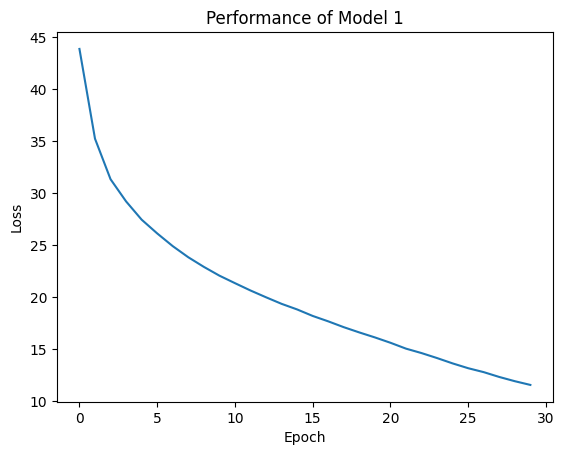

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(n_epochs), train_loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Performance of Model 1")
plt.show()

Now loading the model with the lowest validation loss value


In [8]:
model.load_state_dict(torch.load("./model_cifar.pt"))

# track test loss
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = (
        np.squeeze(correct_tensor.numpy())
        if not train_on_gpu
        else np.squeeze(correct_tensor.cpu().numpy())
    )
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss / len(test_loader)
print("Test Loss: {:.6f}\n".format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print(
            "Test Accuracy of %5s: %2d%% (%2d/%2d)"
            % (
                classes[i],
                100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]),
                np.sum(class_total[i]),
            )
        )
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print(
    "\nTest Accuracy (Overall): %2d%% (%2d/%2d)"
    % (
        100.0 * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct),
        np.sum(class_total),
    )
)

C:\Users\paull\AppData\Local\Temp\ipykernel_14064\3291884398.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("./model_cifar.pt"))


Test Loss: 21.906665

Test Accuracy of airplane: 76% (760/1000)
Test Accuracy of automobile: 77% (771/1000)
Test Accuracy of  bird: 55% (552/1000)
Test Accuracy of   cat: 47% (475/1000)
Test Accuracy of  deer: 43% (435/1000)
Test Accuracy of   dog: 41% (419/1000)
Test Accuracy of  frog: 72% (725/1000)
Test Accuracy of horse: 74% (749/1000)
Test Accuracy of  ship: 68% (681/1000)
Test Accuracy of truck: 64% (649/1000)

Test Accuracy (Overall): 62% (6216/10000)


### New CNN

Build a new network with the following structure.

- It has 3 convolutional layers of kernel size 3 and padding of 1.
- The first convolutional layer must output 16 channels, the second 32 and the third 64.
- At each convolutional layer output, we apply a ReLU activation then a MaxPool with kernel size of 2.
- Then, three fully connected layers, the first two being followed by a ReLU activation and a dropout whose value you will suggest.
- The first fully connected layer will have an output size of 512.
- The second fully connected layer will have an output size of 64.

Compare the results obtained with this new network to those obtained previously.

In [4]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 10)

        self.dropout = nn.Dropout(0.2)
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)

        return x


# create a complete CNN
model = Net()
print(model)
# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # specify loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)  # specify optimizer

n_epochs = 30  # number of epochs to train the model
train_loss_list = []  # list to store loss to visualize
valid_loss_list = []  # list to store loss to visualize
valid_loss_min = np.inf  # track change in validation loss

for epoch in range(n_epochs):
    # Keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0

    # Train the model
    model.train()
    for data, target in train_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Clear the gradients of all optimized variables
        optimizer.zero_grad()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer.step()
        # Update training loss
        train_loss += loss.item() * data.size(0)

    # Validate the model
    model.eval()
    for data, target in valid_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Update average validation loss
        valid_loss += loss.item() * data.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader)
    valid_loss = valid_loss / len(valid_loader)
    train_loss_list.append(train_loss)
    valid_loss_list.append(valid_loss)

    # Print training/validation statistics
    print(
        "Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}".format(
            epoch, train_loss, valid_loss
        )
    )

    # Save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print(
            "Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...".format(
                valid_loss_min, valid_loss
            )
        )
        torch.save(model.state_dict(), "model_cifar_2.pt")
        valid_loss_min = valid_loss

Epoch: 0 	Training Loss: 45.236917 	Validation Loss: 41.998748
Validation loss decreased (inf --> 41.998748).  Saving model ...
Epoch: 1 	Training Loss: 38.824124 	Validation Loss: 33.947001
Validation loss decreased (41.998748 --> 33.947001).  Saving model ...
Epoch: 2 	Training Loss: 33.042267 	Validation Loss: 30.467956
Validation loss decreased (33.947001 --> 30.467956).  Saving model ...
Epoch: 3 	Training Loss: 30.090179 	Validation Loss: 28.479676
Validation loss decreased (30.467956 --> 28.479676).  Saving model ...
Epoch: 4 	Training Loss: 27.596514 	Validation Loss: 25.822686
Validation loss decreased (28.479676 --> 25.822686).  Saving model ...
Epoch: 5 	Training Loss: 25.512156 	Validation Loss: 23.781000
Validation loss decreased (25.822686 --> 23.781000).  Saving model ...
Epoch: 6 	Training Loss: 23.692945 	Validation Loss: 22.571920
Validation loss decreased (23.781000 --> 22.571920).  Saving model ...
Epoch: 7 	Training Loss: 22.063477 	Validation Loss: 21.017597
Valid

We can see that 20 epochs are enough to train the model. After, it starts to overfit

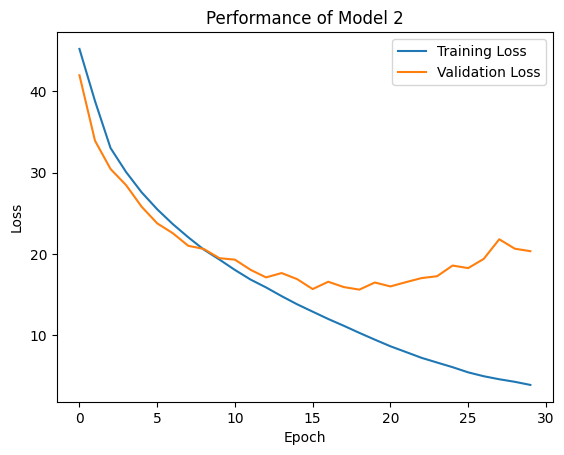

In [6]:
import matplotlib.pyplot as plt

plt.plot(range(n_epochs), train_loss_list, label="Training Loss")
plt.plot(range(n_epochs), valid_loss_list, label="Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Performance of Model 2")
plt.show()

In [7]:
model.load_state_dict(torch.load("./model_cifar_2.pt"))

# track test loss
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = (
        np.squeeze(correct_tensor.numpy())
        if not train_on_gpu
        else np.squeeze(correct_tensor.cpu().numpy())
    )
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss / len(test_loader)
print("Test Loss: {:.6f}\n".format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print(
            "Test Accuracy of %5s: %2d%% (%2d/%2d)"
            % (
                classes[i],
                100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]),
                np.sum(class_total[i]),
            )
        )
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print(
    "\nTest Accuracy (Overall): %2d%% (%2d/%2d)"
    % (
        100.0 * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct),
        np.sum(class_total),
    )
)

C:\Users\paull\AppData\Local\Temp\ipykernel_31444\3634208260.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("./model_cifar_2.pt"))


Test Loss: 16.126041

Test Accuracy of airplane: 81% (810/1000)
Test Accuracy of automobile: 89% (896/1000)
Test Accuracy of  bird: 59% (595/1000)
Test Accuracy of   cat: 53% (533/1000)
Test Accuracy of  deer: 68% (689/1000)
Test Accuracy of   dog: 66% (661/1000)
Test Accuracy of  frog: 75% (756/1000)
Test Accuracy of horse: 75% (754/1000)
Test Accuracy of  ship: 81% (811/1000)
Test Accuracy of truck: 80% (809/1000)

Test Accuracy (Overall): 73% (7314/10000)


**Test model 1 :**
```a
Test Loss: 21.906665

Test Accuracy of airplane: 76% (760/1000)
Test Accuracy of automobile: 77% (771/1000)
Test Accuracy of  bird: 55% (552/1000)
Test Accuracy of   cat: 47% (475/1000)
Test Accuracy of  deer: 43% (435/1000)
Test Accuracy of   dog: 41% (419/1000)
Test Accuracy of  frog: 72% (725/1000)
Test Accuracy of horse: 74% (749/1000)
Test Accuracy of  ship: 68% (681/1000)
Test Accuracy of truck: 64% (649/1000)

Test Accuracy (Overall): 62% (6216/10000)
```
![image](image_notebook/performance_model_1.png)

**Test model 2 :**

```a
Test Loss: 16.126041

Test Accuracy of airplane: 81% (810/1000)
Test Accuracy of automobile: 89% (896/1000)
Test Accuracy of  bird: 59% (595/1000)
Test Accuracy of   cat: 53% (533/1000)
Test Accuracy of  deer: 68% (689/1000)
Test Accuracy of   dog: 66% (661/1000)
Test Accuracy of  frog: 75% (756/1000)
Test Accuracy of horse: 75% (754/1000)
Test Accuracy of  ship: 81% (811/1000)
Test Accuracy of truck: 80% (809/1000)

Test Accuracy (Overall): 73% (7314/10000)
```
![image](image_notebook/performance_model_2.png)


We can see that the second model has better results.

## Exercise 2: Quantization: try to compress the CNN to save space

Quantization doc is available from https://pytorch.org/docs/stable/quantization.html#torch.quantization.quantize_dynamic
        
The Exercise is to quantize post training the above CNN model. Compare the size reduction and the impact on the classification accuracy 


The size of the model is simply the size of the file.

In [8]:
import os


def print_size_of_model(model, label=""):
    torch.save(model.state_dict(), "temp.p")
    size = os.path.getsize("temp.p")
    print("model: ", label, " \t", "Size (KB):", size / 1e3)
    os.remove("temp.p")
    return size


print_size_of_model(model, "fp32")

model:  fp32  	 Size (KB): 2331.074


2331074

### Post training quantization example

In [9]:
import torch.quantization

model.to("cpu")
quantized_model = torch.quantization.quantize_dynamic(model, dtype=torch.qint8)
# quantized_model.save("model_cifar_2_quantized.pt")
torch.save(quantized_model.state_dict(), "model_cifar_2_quantized.pt")
print_size_of_model(quantized_model, "int8")

model:  int8  	 Size (KB): 659.806


659806

In [10]:
quantized_model.load_state_dict(torch.load("model_cifar_2_quantized.pt"))

# track test loss
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

quantized_model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    # if train_on_gpu:
    #     data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = quantized_model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = (
        np.squeeze(correct_tensor.numpy())
        if not train_on_gpu
        else np.squeeze(correct_tensor.cpu().numpy())
    )
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss / len(test_loader)
print("Test Loss: {:.6f}\n".format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print(
            "Test Accuracy of %5s: %2d%% (%2d/%2d)"
            % (
                classes[i],
                100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]),
                np.sum(class_total[i]),
            )
        )
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print(
    "\nTest Accuracy (Overall): %2d%% (%2d/%2d)"
    % (
        100.0 * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct),
        np.sum(class_total),
    )
)

C:\Users\paull\AppData\Local\Temp\ipykernel_31444\3835200341.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  quantized_model.load_state_dict(torch.load("model_cifar_2_qu

Test Loss: 16.135868

Test Accuracy of airplane: 81% (813/1000)
Test Accuracy of automobile: 89% (898/1000)
Test Accuracy of  bird: 59% (596/1000)
Test Accuracy of   cat: 53% (536/1000)
Test Accuracy of  deer: 69% (695/1000)
Test Accuracy of   dog: 66% (660/1000)
Test Accuracy of  frog: 76% (760/1000)
Test Accuracy of horse: 75% (751/1000)
Test Accuracy of  ship: 81% (811/1000)
Test Accuracy of truck: 80% (808/1000)

Test Accuracy (Overall): 73% (7328/10000)


For each class, compare the classification test accuracy of the initial model and the quantized model. Also give the overall test accuracy for both models.

The results for each class for the previous were : 
```a
Test Loss: 16.126041

Test Accuracy of airplane: 81% (810/1000)
Test Accuracy of automobile: 89% (896/1000)
Test Accuracy of  bird: 59% (595/1000)
Test Accuracy of   cat: 53% (533/1000)
Test Accuracy of  deer: 68% (689/1000)
Test Accuracy of   dog: 66% (661/1000)
Test Accuracy of  frog: 75% (756/1000)
Test Accuracy of horse: 75% (754/1000)
Test Accuracy of  ship: 81% (811/1000)
Test Accuracy of truck: 80% (809/1000)

Test Accuracy (Overall): 73% (7314/10000)
```
Ther results of the quantized model are almost the same as the initial one.

Try training aware quantization to mitigate the impact on the accuracy (doc available here https://pytorch.org/docs/stable/quantization.html#torch.quantization.quantize_dynamic)

### Training a new model with Quantization

In [11]:
# Creation of the new model

import torch.nn as nn
import torch.nn.functional as F


class QuantizedNet(nn.Module):
    def __init__(self):
        super(QuantizedNet, self).__init__()
        self.quant = torch.quantization.QuantStub()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dequant = torch.quantization.DeQuantStub()

        self.dropout = nn.Dropout(0.2)
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        x = self.quant(x)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        x = self.dequant(x)

        return x


# create a complete CNN
model_fp32 = QuantizedNet()
print(model_fp32)
# move tensors to GPU if CUDA is available
if train_on_gpu:
    model_fp32.cuda()


model_fp32.eval()
model_fp32.qconfig = torch.quantization.get_default_qconfig("fbgemm")
# model_fp32_fused = torch.quantization.fuse_modules(
#     model_fp32, [["conv1", "conv2", "conv3", "pool"]]
# )
model_fp32_prepared = torch.quantization.prepare_qat(model_fp32.train())

QuantizedNet(
  (quant): QuantStub()
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dequant): DeQuantStub()
  (dropout): Dropout(p=0.2, inplace=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


c:\Users\paull\miniforge3\envs\deep_learning\Lib\site-packages\torch\ao\quantization\observer.py:229: UserWarning: Please use quant_min and quant_max to specify the range for observers.                     reduce_range will be deprecated in a future release of PyTorch.
  warnings.warn(


In [12]:
# Training the quantized model
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # specify loss function
optimizer = optim.SGD(model_fp32_prepared.parameters(), lr=0.01)  # specify optimizer

n_epochs = 30  # number of epochs to train the model
train_loss_list = []  # list to store loss to visualize
valid_loss_list = []  # list to store loss to visualize
valid_loss_min = np.inf  # track change in validation loss

for epoch in range(n_epochs):
    # Keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0

    # Train the model
    model_fp32_prepared.train()
    for data, target in train_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Clear the gradients of all optimized variables
        optimizer.zero_grad()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model_fp32_prepared(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer.step()
        # Update training loss
        train_loss += loss.item() * data.size(0)

    # Validate the model
    model_fp32_prepared.eval()
    for data, target in valid_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model_fp32_prepared(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Update average validation loss
        valid_loss += loss.item() * data.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader)
    valid_loss = valid_loss / len(valid_loader)
    train_loss_list.append(train_loss)
    valid_loss_list.append(valid_loss)

    # Print training/validation statistics
    print(
        "Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}".format(
            epoch, train_loss, valid_loss
        )
    )

    # Save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print(
            "Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...".format(
                valid_loss_min, valid_loss
            )
        )
        torch.save(model_fp32_prepared.state_dict(), "model_QAT.pt")
        valid_loss_min = valid_loss

Epoch: 0 	Training Loss: 43.606210 	Validation Loss: 39.300230
Validation loss decreased (inf --> 39.300230).  Saving model ...
Epoch: 1 	Training Loss: 36.534060 	Validation Loss: 32.543904
Validation loss decreased (39.300230 --> 32.543904).  Saving model ...
Epoch: 2 	Training Loss: 31.890563 	Validation Loss: 29.764324
Validation loss decreased (32.543904 --> 29.764324).  Saving model ...
Epoch: 3 	Training Loss: 29.134816 	Validation Loss: 27.586049
Validation loss decreased (29.764324 --> 27.586049).  Saving model ...
Epoch: 4 	Training Loss: 26.931122 	Validation Loss: 25.145404
Validation loss decreased (27.586049 --> 25.145404).  Saving model ...
Epoch: 5 	Training Loss: 25.010559 	Validation Loss: 24.073391
Validation loss decreased (25.145404 --> 24.073391).  Saving model ...
Epoch: 6 	Training Loss: 23.275837 	Validation Loss: 22.406685
Validation loss decreased (24.073391 --> 22.406685).  Saving model ...
Epoch: 7 	Training Loss: 21.881361 	Validation Loss: 21.359056
Valid

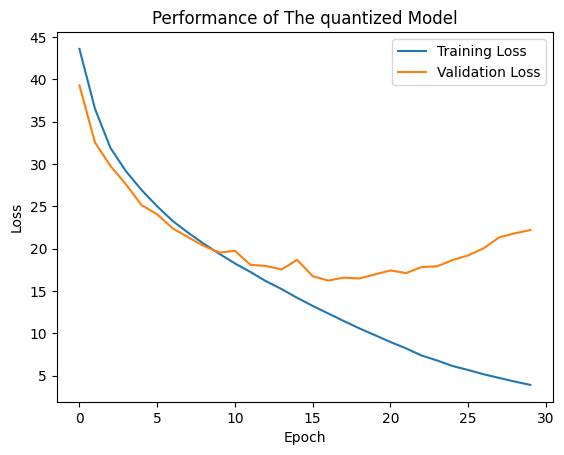

In [18]:
import matplotlib.pyplot as plt

plt.plot(range(n_epochs), train_loss_list, label="Training Loss")
plt.plot(range(n_epochs), valid_loss_list, label="Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Performance of The quantized Model")
plt.show()

In [16]:
# quantized_model.load_state_dict(torch.load("model_QAT.pt"))
quantized_model = torch.quantization.quantize_dynamic(model_fp32_prepared, dtype=torch.qint8)

# track test loss
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

quantized_model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = quantized_model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = (
        np.squeeze(correct_tensor.numpy())
        if not train_on_gpu
        else np.squeeze(correct_tensor.cpu().numpy())
    )
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss / len(test_loader)
print("Test Loss: {:.6f}\n".format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print(
            "Test Accuracy of %5s: %2d%% (%2d/%2d)"
            % (
                classes[i],
                100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]),
                np.sum(class_total[i]),
            )
        )
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print(
    "\nTest Accuracy (Overall): %2d%% (%2d/%2d)"
    % (
        100.0 * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct),
        np.sum(class_total),
    )
)

Test Loss: 21.758577

Test Accuracy of airplane: 78% (787/1000)
Test Accuracy of automobile: 89% (894/1000)
Test Accuracy of  bird: 63% (631/1000)
Test Accuracy of   cat: 49% (499/1000)
Test Accuracy of  deer: 65% (658/1000)
Test Accuracy of   dog: 65% (653/1000)
Test Accuracy of  frog: 85% (854/1000)
Test Accuracy of horse: 78% (789/1000)
Test Accuracy of  ship: 82% (829/1000)
Test Accuracy of truck: 73% (731/1000)

Test Accuracy (Overall): 73% (7325/10000)


The results are also very similar with the two previous models

## Exercise 3: working with pre-trained models.

PyTorch offers several pre-trained models https://pytorch.org/vision/0.8/models.html        
We will use ResNet50 trained on ImageNet dataset (https://www.image-net.org/index.php). Use the following code with the files `imagenet-simple-labels.json` that contains the imagenet labels and the image dog.png that we will use as test.


c:\Users\paull\miniforge3\envs\deep_learning\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\paull\miniforge3\envs\deep_learning\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Predicted class is: Golden Retriever


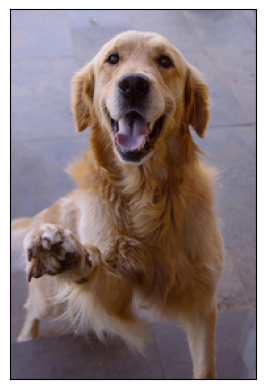

In [17]:
import json
from PIL import Image

# Choose an image to pass through the model
test_image = "dog.png"

# Configure matplotlib for pretty inline plots
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

# Prepare the labels
with open("imagenet-simple-labels.json") as f:
    labels = json.load(f)

# First prepare the transformations: resize the image to what the model was trained on and convert it to a tensor
data_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)
# Load the image

image = Image.open(test_image)
plt.imshow(image), plt.xticks([]), plt.yticks([])

# Now apply the transformation, expand the batch dimension, and send the image to the GPU
# image = data_transform(image).unsqueeze(0).cuda()
image = data_transform(image).unsqueeze(0)

# Download the model if it's not there already. It will take a bit on the first run, after that it's fast
model = models.resnet50(pretrained=True)
# Send the model to the GPU
# model.cuda()
# Set layers such as dropout and batchnorm in evaluation mode
model.eval()

# Get the 1000-dimensional model output
out = model(image)
# Find the predicted class
print("Predicted class is: {}".format(labels[out.argmax()]))

### Experiments:

Study the code and the results obtained. Possibly add other images downloaded from the internet.

What is the size of the model? Quantize it and then check if the model is still able to correctly classify the other images.

Experiment with other pre-trained CNN models.

**Test on new images**

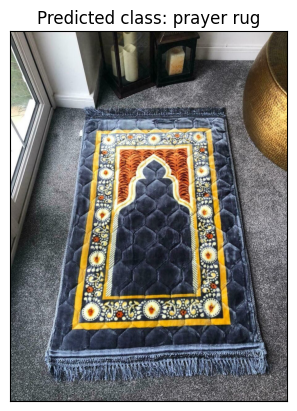

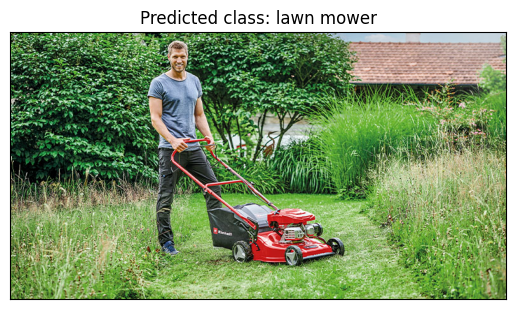

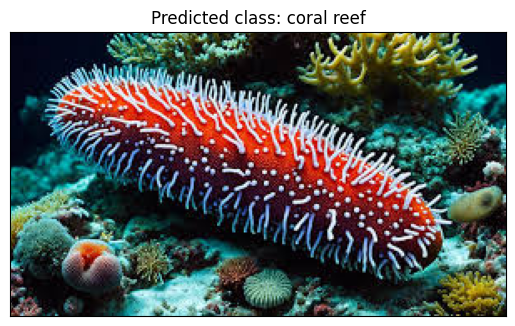

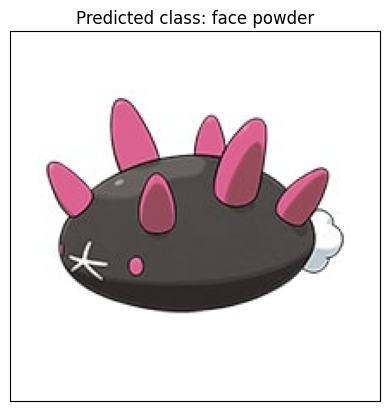

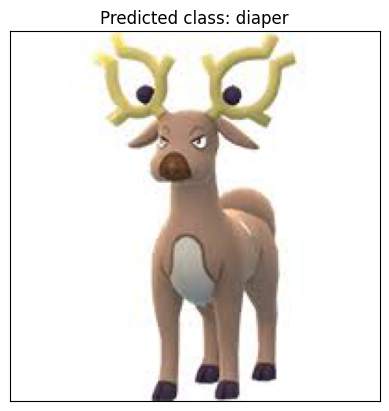

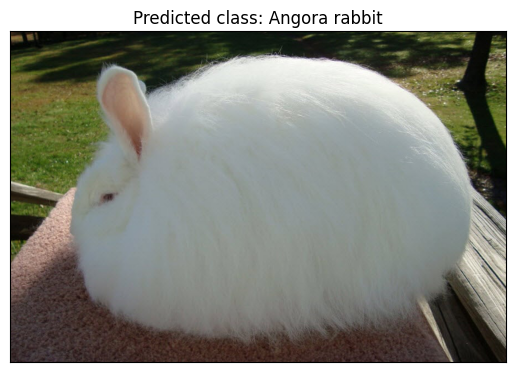

In [90]:
for i in range(1,7):
    image_path = f"image_test/{i}.jpg"
    image = Image.open(image_path)

    image_2 = data_transform(image).unsqueeze(0)
    model = models.resnet50(pretrained=True)
    model.eval()
    out = model(image_2)
    # print("Predicted class is: {}".format(labels[out.argmax()]))

    plt.figure()
    plt.title(f"Predicted class: {labels[out.argmax()]}")
    plt.imshow(image), plt.xticks([]), plt.yticks([]), 

**Quantization of the model**

In [ ]:
size_not_quantized = print_size_of_model(model, "ResNet50")

import torch.quantization

# model.to("cpu")
quantized_model = torch.quantization.quantize_dynamic(model, dtype=torch.qint8)
torch.save(quantized_model.state_dict(), "model_cifar_2_quantized.pt")
size_quantized = print_size_of_model(quantized_model, "int8")

ratio = size_quantized / size_not_quantized
print(f"Ratio : {ratio*100:4f} %")

model:  ResNet50  	 Size (KB): 102523.238
model:  int8  	 Size (KB): 96379.996
Ratio : 94.007952 %


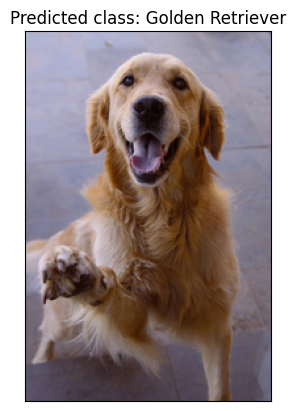

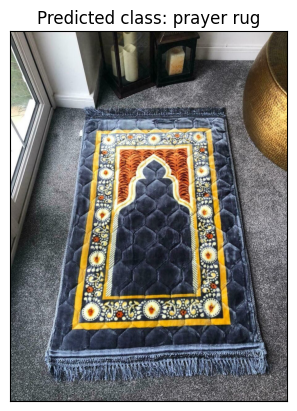

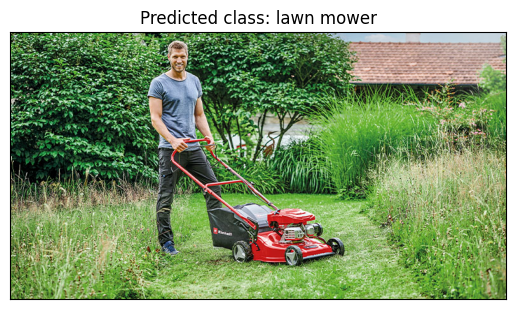

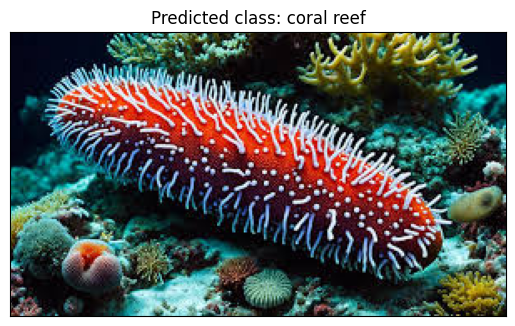

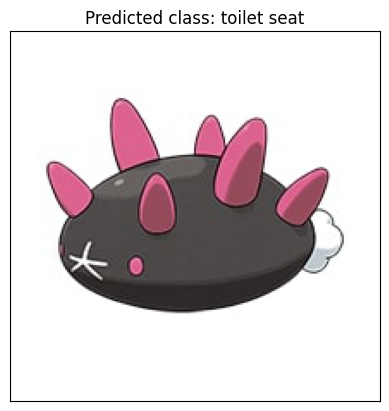

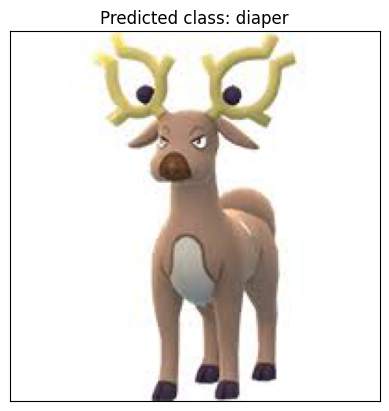

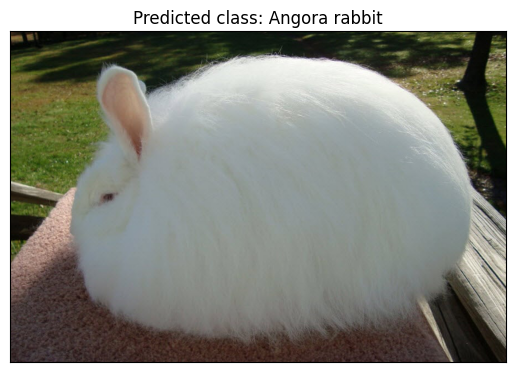

In [103]:
image_path = f"dog.png"
image = Image.open(image_path)

image_2 = data_transform(image).unsqueeze(0)
model = models.resnet50(pretrained=True)
model.eval()
out = quantized_model(image_2)
# print("Predicted class is: {}".format(labels[out.argmax()]))

plt.figure()
plt.title(f"Predicted class: {labels[out.argmax()]}")
plt.imshow(image), plt.xticks([]), plt.yticks([]), 


for i in range(1,7):
    image_path = f"image_test/{i}.jpg"
    image = Image.open(image_path)

    image_2 = data_transform(image).unsqueeze(0)
    model = models.resnet50(pretrained=True)
    model.eval()
    out = quantized_model(image_2)
    # print("Predicted class is: {}".format(labels[out.argmax()]))

    plt.figure()
    plt.title(f"Predicted class: {labels[out.argmax()]}")
    plt.imshow(image), plt.xticks([]), plt.yticks([]), 

# TEST ON ANOTHER CNN-MODEL

## Exercise 4: Transfer Learning
    
    
For this work, we will use a pre-trained model (ResNet18) as a descriptor extractor and will refine the classification by training only the last fully connected layer of the network. Thus, the output layer of the pre-trained network will be replaced by a layer adapted to the new classes to be recognized which will be in our case ants and bees.
Download and unzip in your working directory the dataset available at the address :
    
https://download.pytorch.org/tutorial/hymenoptera_data.zip
    
Execute the following code in order to display some images of the dataset.

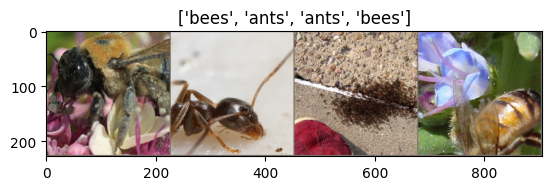

In [19]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomResizedCrop(
                224
            ),  # ImageNet models were trained on 224x224 images
            transforms.RandomHorizontalFlip(),  # flip horizontally 50% of the time - increases train set variability
            transforms.ToTensor(),  # convert it to a PyTorch tensor
            transforms.Normalize(
                [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
            ),  # ImageNet models expect this norm
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}

data_dir = "hymenoptera_data"
# Create train and validation datasets and loaders
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ["train", "val"]
}
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=4, shuffle=True, num_workers=0
    )
    for x in ["train", "val"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Helper function for displaying images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Un-normalize the images
    inp = std * inp + mean
    # Clip just in case
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders["train"]))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])



Now, execute the following code which uses a pre-trained model ResNet18 having replaced the output layer for the ants/bees classification and performs the model training by only changing the weights of this output layer.

In [24]:
import copy
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.optim import lr_scheduler
from torchvision import datasets, transforms

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomResizedCrop(
                224
            ),  # ImageNet models were trained on 224x224 images
            transforms.RandomHorizontalFlip(),  # flip horizontally 50% of the time - increases train set variability
            transforms.ToTensor(),  # convert it to a PyTorch tensor
            transforms.Normalize(
                [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
            ),  # ImageNet models expect this norm
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}

# data_dir = "hymenoptera_data"
# # Create train and validation datasets and loaders
# image_datasets = {
#     x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
#     for x in ["train", "val"]
# }
# dataloaders = {
#     x: torch.utils.data.DataLoader(
#         image_datasets[x], batch_size=4, shuffle=True, num_workers=4
#     )
#     for x in ["train", "val"]
# }
# dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
# class_names = image_datasets["train"].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def get_data(data_dir):
    image_datasets = {
        x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
        for x in ["train", "val"]
    }
    dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}

    # Split the dataset into training, validation, and test sets
    train_size = int(0.8 * dataset_sizes['train'])
    val_size = int(0.8 * dataset_sizes['val'])
    test_size_1 = dataset_sizes['train'] - train_size
    test_size_2 = dataset_sizes['val'] - val_size

    train_dataset, test_dataset_1 = torch.utils.data.random_split(
        image_datasets['train'], [train_size, test_size_1]
    )

    val_dataset, test_dataset_2 = torch.utils.data.random_split(
        image_datasets['val'], [val_size, test_size_2]
    )

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=True, num_workers=4)
    test_dataset = torch.utils.data.ConcatDataset([test_dataset_1, test_dataset_2])
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=True, num_workers=4)

    class_names = image_datasets["train"].classes

    return train_loader, val_loader, test_loader, class_names

# Helper function for displaying images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Un-normalize the images
    inp = std * inp + mean
    # Clip just in case
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.show()


train_loader, valid_loader, test_loader, class_names = get_data("hymenoptera_data")
dataloaders = {"train": train_loader, "val": valid_loader}



# Get a batch of training data
# inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
# out = torchvision.utils.make_grid(inputs)

# imshow(out, title=[class_names[x] for x in classes])
# training


def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    epoch_time = []  # we'll keep track of the time needed for each epoch

    for epoch in range(num_epochs):
        epoch_start = time.time()
        print("Epoch {}/{}".format(epoch + 1, num_epochs))
        print("-" * 10)

        # Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Track history if only in training phase
                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            # Deep copy the model
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        # Add the epoch time
        t_epoch = time.time() - epoch_start
        epoch_time.append(t_epoch)
        print()

    time_elapsed = time.time() - since
    print(
        "Training complete in {:.0f}m {:.0f}s".format(
            time_elapsed // 60, time_elapsed % 60
        )
    )
    print("Best val Acc: {:4f}".format(best_acc))

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, epoch_time


# Download a pre-trained ResNet18 model and freeze its weights
model = torchvision.models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
# Send the model to the GPU
model = model.to(device)
# Set the loss function
criterion = nn.CrossEntropyLoss()

# Observe that only the parameters of the final layer are being optimized
optimizer_conv = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)
model, epoch_time = train_model(
    model, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10
)


Epoch 1/10
----------
train Loss: 0.4795 Acc: 0.5328
val Loss: 0.2176 Acc: 0.7190

Epoch 2/10
----------
train Loss: 0.3297 Acc: 0.6434
val Loss: 0.1983 Acc: 0.7190

Epoch 3/10
----------
train Loss: 0.3887 Acc: 0.6230
val Loss: 0.1625 Acc: 0.7386

Epoch 4/10
----------
train Loss: 0.4018 Acc: 0.6025
val Loss: 0.2731 Acc: 0.7059

Epoch 5/10
----------
train Loss: 0.3857 Acc: 0.6352
val Loss: 0.3163 Acc: 0.6732

Epoch 6/10
----------
train Loss: 0.4596 Acc: 0.6025
val Loss: 0.1685 Acc: 0.7386

Epoch 7/10
----------
train Loss: 0.3127 Acc: 0.6762
val Loss: 0.1404 Acc: 0.7516

Epoch 8/10
----------
train Loss: 0.2412 Acc: 0.6967
val Loss: 0.1381 Acc: 0.7582

Epoch 9/10
----------
train Loss: 0.2492 Acc: 0.6721
val Loss: 0.1462 Acc: 0.7516

Epoch 10/10
----------
train Loss: 0.3004 Acc: 0.6803
val Loss: 0.1568 Acc: 0.7386

Training complete in 2m 27s
Best val Acc: 0.758170


Experiments:
Study the code and the results obtained.

Modify the code and add an "eval_model" function to allow
the evaluation of the model on a test set (different from the learning and validation sets used during the learning phase). Study the results obtained.

Now modify the code to replace the current classification layer with a set of two layers using a "relu" activation function for the middle layer, and the "dropout" mechanism for both layers. Renew the experiments and study the results obtained.

Apply ther quantization (post and quantization aware) and evaluate impact on model size and accuracy.

In [46]:
next(model.parameters()).is_cuda

False

In [ ]:
def eval_model(model, test_loader):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            if next(model.parameters()).is_cuda:
                images, labels = images.cuda(), labels.cuda()
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

    return correct / total

eval_model(model, train_loader)

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

In [41]:
# Download a pre-trained ResNet18 model and freeze its weights
model = torchvision.models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer with two layers using ReLU and Dropout
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 2),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(2, 2),
)

# Send the model to the GPU
model = model.to(device)
# Set the loss function
criterion = nn.CrossEntropyLoss()

# Observe that only the parameters of the final layers are being optimized
optimizer_conv = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)
model, epoch_time = train_model(
    model, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=20
)

eval_model(model, train_loader)

c:\Users\paull\miniforge3\envs\deep_learning\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\paull\miniforge3\envs\deep_learning\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20
----------


c:\Users\paull\miniforge3\envs\deep_learning\Lib\site-packages\torch\optim\lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


train Loss: 0.6012 Acc: 0.4139
val Loss: 0.5111 Acc: 0.4444

Epoch 2/20
----------
train Loss: 0.5509 Acc: 0.4467
val Loss: 0.4629 Acc: 0.5752

Epoch 3/20
----------
train Loss: 0.5496 Acc: 0.4590
val Loss: 0.4117 Acc: 0.7582

Epoch 4/20
----------
train Loss: 0.5218 Acc: 0.4918
val Loss: 0.4567 Acc: 0.6667

Epoch 5/20
----------
train Loss: 0.5565 Acc: 0.4590
val Loss: 0.4519 Acc: 0.6013

Epoch 6/20
----------
train Loss: 0.5008 Acc: 0.5164
val Loss: 0.3915 Acc: 0.7386

Epoch 7/20
----------
train Loss: 0.4898 Acc: 0.5410
val Loss: 0.3625 Acc: 0.7582

Epoch 8/20
----------
train Loss: 0.4878 Acc: 0.5492
val Loss: 0.3619 Acc: 0.7516

Epoch 9/20
----------
train Loss: 0.4887 Acc: 0.5697
val Loss: 0.3578 Acc: 0.7582

Epoch 10/20
----------
train Loss: 0.4755 Acc: 0.5779
val Loss: 0.3623 Acc: 0.7516

Epoch 11/20
----------
train Loss: 0.4784 Acc: 0.5492
val Loss: 0.3550 Acc: 0.7582

Epoch 12/20
----------
train Loss: 0.4928 Acc: 0.5492
val Loss: 0.3678 Acc: 0.7451

Epoch 13/20
----------


0.9128205128205128

In [42]:
import torch.quantization

# model.to("cpu")
print_size_of_model(model, "fp32")
quantized_model = torch.quantization.quantize_dynamic(model, dtype=torch.qint8)
# quantized_model.save("model_cifar_2_quantized.pt")
# torch.save(quantized_model.state_dict(), "model_cifar_2_quantized.pt")
print_size_of_model(quantized_model, "quantized")

eval_model(quantized_model, train_loader)

model:  fp32  	 Size (KB): 45834.032
model:  quantized  	 Size (KB): 45046.674


NotImplementedError: Could not run 'quantized::linear_dynamic' with arguments from the 'CUDA' backend. This could be because the operator doesn't exist for this backend, or was omitted during the selective/custom build process (if using custom build). If you are a Facebook employee using PyTorch on mobile, please visit https://fburl.com/ptmfixes for possible resolutions. 'quantized::linear_dynamic' is only available for these backends: [CPU, Meta, BackendSelect, Python, FuncTorchDynamicLayerBackMode, Functionalize, Named, Conjugate, Negative, ZeroTensor, ADInplaceOrView, AutogradOther, AutogradCPU, AutogradCUDA, AutogradXLA, AutogradMPS, AutogradXPU, AutogradHPU, AutogradLazy, AutogradMeta, Tracer, AutocastCPU, AutocastXPU, AutocastMPS, AutocastCUDA, FuncTorchBatched, BatchedNestedTensor, FuncTorchVmapMode, Batched, VmapMode, FuncTorchGradWrapper, PythonTLSSnapshot, FuncTorchDynamicLayerFrontMode, PreDispatch, PythonDispatcher].

CPU: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\quantized\cpu\qlinear_dynamic.cpp:791 [kernel]
Meta: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\core\MetaFallbackKernel.cpp:23 [backend fallback]
BackendSelect: fallthrough registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\core\BackendSelectFallbackKernel.cpp:3 [backend fallback]
Python: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\core\PythonFallbackKernel.cpp:153 [backend fallback]
FuncTorchDynamicLayerBackMode: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\functorch\DynamicLayer.cpp:497 [backend fallback]
Functionalize: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\FunctionalizeFallbackKernel.cpp:349 [backend fallback]
Named: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\core\NamedRegistrations.cpp:7 [backend fallback]
Conjugate: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\ConjugateFallback.cpp:17 [backend fallback]
Negative: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\NegateFallback.cpp:18 [backend fallback]
ZeroTensor: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\ZeroTensorFallback.cpp:86 [backend fallback]
ADInplaceOrView: fallthrough registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\core\VariableFallbackKernel.cpp:96 [backend fallback]
AutogradOther: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\core\VariableFallbackKernel.cpp:63 [backend fallback]
AutogradCPU: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\core\VariableFallbackKernel.cpp:67 [backend fallback]
AutogradCUDA: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\core\VariableFallbackKernel.cpp:75 [backend fallback]
AutogradXLA: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\core\VariableFallbackKernel.cpp:79 [backend fallback]
AutogradMPS: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\core\VariableFallbackKernel.cpp:87 [backend fallback]
AutogradXPU: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\core\VariableFallbackKernel.cpp:71 [backend fallback]
AutogradHPU: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\core\VariableFallbackKernel.cpp:100 [backend fallback]
AutogradLazy: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\core\VariableFallbackKernel.cpp:83 [backend fallback]
AutogradMeta: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\core\VariableFallbackKernel.cpp:91 [backend fallback]
Tracer: registered at C:\cb\pytorch_1000000000000\work\torch\csrc\autograd\TraceTypeManual.cpp:294 [backend fallback]
AutocastCPU: fallthrough registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\autocast_mode.cpp:321 [backend fallback]
AutocastXPU: fallthrough registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\autocast_mode.cpp:463 [backend fallback]
AutocastMPS: fallthrough registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\autocast_mode.cpp:209 [backend fallback]
AutocastCUDA: fallthrough registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\autocast_mode.cpp:165 [backend fallback]
FuncTorchBatched: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\functorch\LegacyBatchingRegistrations.cpp:731 [backend fallback]
BatchedNestedTensor: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\functorch\LegacyBatchingRegistrations.cpp:758 [backend fallback]
FuncTorchVmapMode: fallthrough registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\functorch\VmapModeRegistrations.cpp:27 [backend fallback]
Batched: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\LegacyBatchingRegistrations.cpp:1075 [backend fallback]
VmapMode: fallthrough registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\VmapModeRegistrations.cpp:33 [backend fallback]
FuncTorchGradWrapper: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\functorch\TensorWrapper.cpp:207 [backend fallback]
PythonTLSSnapshot: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\core\PythonFallbackKernel.cpp:161 [backend fallback]
FuncTorchDynamicLayerFrontMode: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\functorch\DynamicLayer.cpp:493 [backend fallback]
PreDispatch: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\core\PythonFallbackKernel.cpp:165 [backend fallback]
PythonDispatcher: registered at C:\cb\pytorch_1000000000000\work\aten\src\ATen\core\PythonFallbackKernel.cpp:157 [backend fallback]


## Optional
    
Try this at home!! 


Pytorch offers a framework to export a given CNN to your selfphone (either android or iOS). Have a look at the tutorial https://pytorch.org/mobile/home/

The Exercise consists in deploying the CNN of Exercise 4 in your phone and then test it on live.



## Author

Alberto BOSIO - Ph. D.